In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Rastrigin

In [ ]:
def rastrigin(populacao):
    y = []
    for ind in populacao:
        ind_x = 10+ind[0]**2 - 10*math.cos(2*math.pi*ind[0])
        ind_y = 10+ind[1]**2 - 10*math.cos(2*math.pi*ind[1])
        ind_z = 10+ind[2]**2 - 10*math.cos(2*math.pi*ind[2])
        result = ind_x + ind_y + ind_z
        y.append(result)
    return y

In [ ]:
teste = [[1.0,1.0,1.0],[2.0,2.0,2.0]]
rastrigin(teste)

[3.0, 12.0]

# Inicializar população

In [ ]:
def inic_pop(n_ind,seed):
    random.seed(seed)
    populacao = []
    
    for i in range(n_ind):
      ind = []
      for j in range(3):
        rand = random.uniform(-5.12,5.12)
        ind.append(rand)
      populacao.append(ind)
    
    return populacao

In [ ]:
pop = inic_pop(10,4)
print(pop)

[[-2.7, -4.06, -1.06], [-3.53, -4.44, -1.01], [4.28, 3.08, 2.72], [-2.85, 0.38, -2.29], [-3.35, -4.03, -2.92], [4.38, 3.37, 3.14], [3.08, -3.14, -1.95], [1.3, 2.37, 3.63], [3.89, -4.23, 1.08], [1.76, 0.06, -3.3]]


# Seleção

## Roleta

In [ ]:
def roleta(result):
  soma = sum(result)
  result_tmp = np.array(result)
  percent = ((soma/result_tmp)/(sum(soma/result_tmp)))
  cumulativo = np.cumsum(percent)

  pais = []
  for i in range(len(result_tmp)):
    rand = random.uniform(0,1)
    escolha = cumulativo-rand
    indice = np.where(escolha >= 0)[0][0]
    pais.append(indice)
  return pais

In [ ]:
pop = inic_pop(10,4)
result = rastrigin(pop)
roleta(result)

## Torneio

In [ ]:
def torneio(result):
    
    pais = np.random.randint(len(result), size=(2, len(result))) #torneio entre 2
    #print('pais: 'pais)
    ind_a = pais[0, :]
    ind_b = pais[1, :]
    result_a = np.array(result)[ind_a]
    result_b = np.array(result)[ind_b]
    #print('primeiro: ',result_a)
    #print('segundo: ',result_b)
    criterio = result_a < result_b
    
    ind_pais = []
    
    for i in range(len(result)):
      if criterio[i]:
        ind_pais.append(ind_a[i])
      else:
        ind_pais.append(ind_b[i])

            
    return ind_pais

In [ ]:
print(result)
torneio(result)

# Cruzamento

In [ ]:
def cruzamento(indices_selec, pop, taxa_cruz):
  
  pais = np.random.randint(len(indices_selec), size=(2, int(len(indices_selec)/2))) #metade pois cada par irá gerar 2 filhos

  ind_a = pais[0, :]
  ind_b = pais[1, :]


  pop_nova = []

  for i in range(len(ind_a)):  #numero de casais formados
    p1 = pop[ind_a[i]]
    p2 = pop[ind_b[i]]
        
    ponto_troca = np.random.randint(3) #trocar x, y ou z entre si  
    ponto_cruzamento = random.uniform(0,1)   #comparar com probabilidade
    
    if ponto_cruzamento <= taxa_cruz:
      #print("trocou em ",i," valor ",ponto_troca)
      filho1 = p1
      filho2 = p2
      temp = filho1[ponto_troca]
      filho1[ponto_troca] = filho2[ponto_troca]
      filho2[ponto_troca] = temp
      pop_nova.append(filho1)
      pop_nova.append(filho2)
    
    else:
      pop_nova.append(p1)
      pop_nova.append(p2)

  return pop_nova

In [ ]:
teste = roleta(result)
print(pop)
cruzamento(teste,pop,0.5)

# Mutação

In [ ]:
#https://stackoverflow.com/questions/51843297/convert-real-numbers-to-binary-and-vice-versa-in-python
def float_to_binary(x, m, n):
    """Convert the float value `x` to a binary string of length `m + n`
    where the first `m` binary digits are the integer part and the last
    'n' binary digits are the fractional part of `x`.
    """
    x_scaled = round(x * 2 ** n)
    return '{:0{}b}'.format(x_scaled, m + n)

def binary_to_float(bstr, m, n):
    """Convert a binary string in the format given above to its float
    value.
    """
    return int(bstr, 2) / 2 ** n

print(float_to_binary(0.95, 0, 8))
print(binary_to_float('11110011', 0, 8))

11110011
0.94921875


In [ ]:
def mutacao(pop, taxa_mut, tam_bin):   #tam_bin é quantidade de casas binarias. 8 parece um numero interessante. Dá pra testar outros
  tam_mutantes = int((len(pop)*taxa_mut))
  
  for i in range(tam_mutantes):
    
    ind_mut = np.random.randint(0,len(pop))    #seleciona indice mutacionado
    ponto_mut = np.random.randint(3)           #seleciona se muda x,y,z
    mut = float_to_binary(pop[i][ponto_mut],0,tam_bin) #converte
    #print(mut)                                  
    bit_mut = np.random.randint(tam_bin)       #escolhe bit
    novo_bit=''
    if mut[bit_mut] == '0':
      novo_bit = '1'
    else:
      novo_bit = '0'
                                     
    mut2 = '' 
    for i in range(tam_bin):           #trecho só pq string é imutavel. Cria outra.
     if i != bit_mut:
        mut2+=mut[i]
     else:
        mut2+=novo_bit
    #print(mut2)
    #print(pop[i])
    pop[i][ponto_mut] = binary_to_float(mut2,0,8)
    #print(pop[i])
  return pop

In [ ]:
print(pop)
print(mutacao(pop,0.1,8))

# Elitismo

In [ ]:
def selecElitismo(pop,result,taxa_elit):
  qnt_elite = int(len(result)*taxa_elit)
  fx_elite = sorted(result)[:qnt_elite]
  indices_elite = list(np.argsort(result)[:qnt_elite])

  return indices_elite

In [ ]:
def elitismo(pop,elite,resultPop):
  resultElite = rastrigin(elite)
  resultTodo = []
  resultTodo = resultPop + resultElite
  indices_elite_aux = list(np.argsort(resultTodo))
  pop_Todo = pop
  for i in range(len(elite)):
    pop_Todo.append(list(elite[i]))
  
  indices_elite_final = indices_elite_aux[:len(pop_Todo)-len(elite)]
  pop_final = []
    
  for ind in indices_elite_final:
    pop_final.append(pop_Todo[ind])
  
  
  return pop_final

#Plot

In [ ]:
def plot_resultados(resultados, media_resultados):
    
    # Resultado Geral
    plt.plot(resultados, 'blue')
        
    plt.title('Resultado Geral')
    plt.xlabel('Geração')
    plt.ylabel('f(x)')
    plt.legend(['Melhor Performance da Geração'])
    plt.rcParams['figure.figsize'] = (20,10)

    plt.figure()
    
    # Resultado Médio
    plt.plot(media_resultados, 'black')

    plt.title('Resultado Médio')
    plt.xlabel('Geração')
    plt.ylabel('f(x)')
    plt.legend(['Performance Média da Geração'])
    plt.rcParams['figure.figsize'] = (20,10)

    plt.figure()

#Execução

In [ ]:
def algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin):

  media_resultados = []
  resultados = []

  popu = inic_pop(qnt_populacao, seed)
  #print('Pop: ',popu)
  # Respostas para rastrigin
  #print('Resultados: ',result)
  result = rastrigin(popu)
  
  for i in range(n_geracoes):
      
      # Captura dos índices e resultados com melhor desempenho
      #print('seleciona elite')
      ind_elite = []
      ind_elite = selecElitismo(popu,result,taxa_elit)
      elite = list(np.array(popu)[ind_elite])
      
      
      # (2) Seleção
      #print('selecao')
      if selecao == 'roleta':
        pais = roleta(result)
      else:
        pais = torneio(result)
      
      # (3) Cruzamento
      #print('Ok')
      pop_cruz = cruzamento(pais,popu,taxa_cruz)
      
      #print('mutacao')
      # (4) Mutação
      pop_mut = mutacao(pop_cruz,taxa_mut,tam_bin)
      
      

      #print('result pre elitismo')
      resultPop = rastrigin(pop_mut)
      # (5) Elitismo
      #print('elitismo')
      popu = []
      popu = elitismo(pop_mut,elite,resultPop)
      
    
      # Resultados
     # print('result final')
      result = rastrigin(popu)
      media_resultados.append(np.mean(result))
      resultados.append(min(result))

      if i == (n_geracoes - 1):
          print('O valor mínimo obtido foi', min(result))

          print('Os valores numéricos de entrada que trouxeram esse resultado foram', popu[np.argmin(result)])
    
  plot_resultados(resultados, media_resultados)
  return popu

O valor mínimo obtido foi 0.9959184255678473
Os valores numéricos de entrada que trouxeram esse resultado foram [0.0, -0.9971580712727679, 0.0]
CPU times: user 520 ms, sys: 9.07 ms, total: 529 ms
Wall time: 523 ms


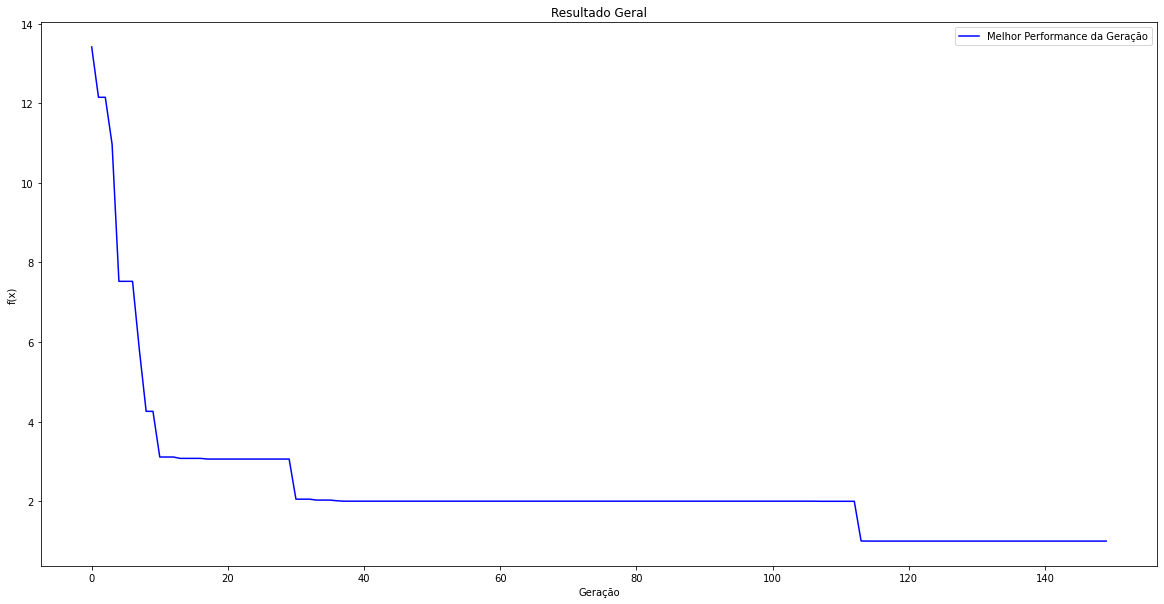

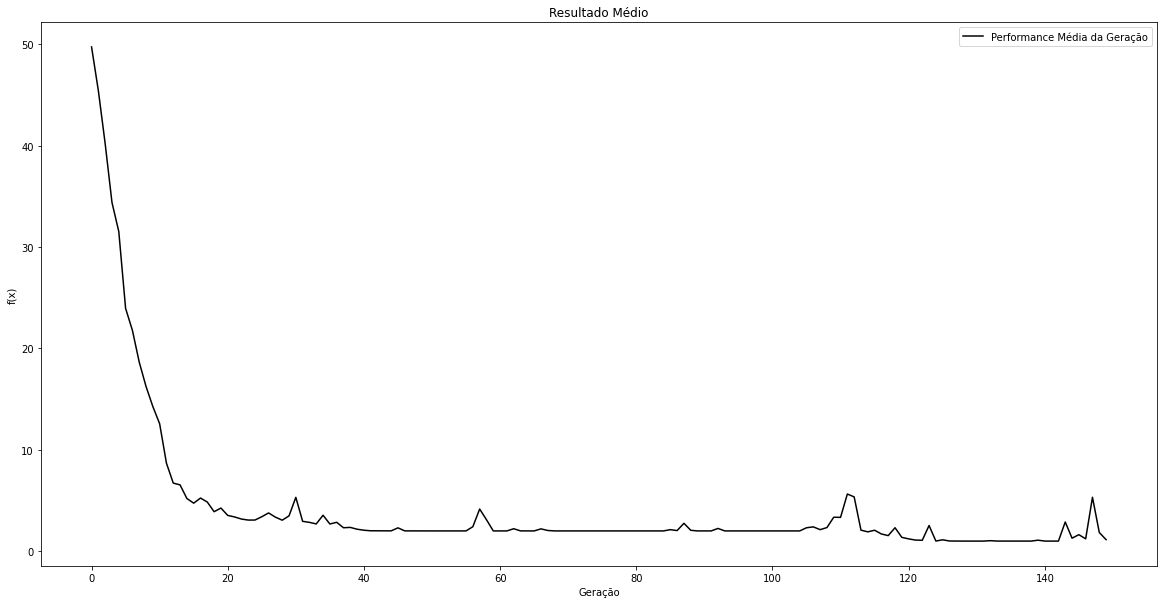

<Figure size 1440x720 with 0 Axes>

In [ ]:
%%time
qnt_populacao = 100
seed = 42
n_geracoes = 150
taxa_elit = 0.1
selecao = 'roleta'
taxa_cruz = 0.7
taxa_mut = 0.3
tam_bin = 10

popu = algoGenetico(qnt_populacao,seed,n_geracoes,taxa_elit,selecao,taxa_cruz,taxa_mut,tam_bin)


In [ ]:
popu

[[0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712727679, 0.0],
 [0.015625, -0.9971580712